<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Paola Silva Muñoz
- Nombre de alumno 2: Carla Guzmán Roa


### **Link de repositorio de GitHub:** `http://....`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
!wget -O diabetes_data.csv https://github.com/Paito249/MDS7202/raw/main/lab10/diabetes_data.csv

--2023-11-24 05:00:10--  https://github.com/Paito249/MDS7202/raw/main/lab10/diabetes_data.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Paito249/MDS7202/main/lab10/diabetes_data.csv [following]
--2023-11-24 05:00:10--  https://raw.githubusercontent.com/Paito249/MDS7202/main/lab10/diabetes_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5287141 (5.0M) [text/plain]
Saving to: ‘diabetes_data.csv’

diabetes_data.csv   100%[===================>]   5.04M  --.-KB/s    in 0.1s    

2023-11-24 05:00:10 (43.6 MB/s) - ‘diabetes_data.csv’ saved [5287141/5287141]



In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?.

In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
# Separar las variables objetivo (y) y las variables predictoras (X)

X=df.drop('Diabetes', axis=1)
y=df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [ ]:
X.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000


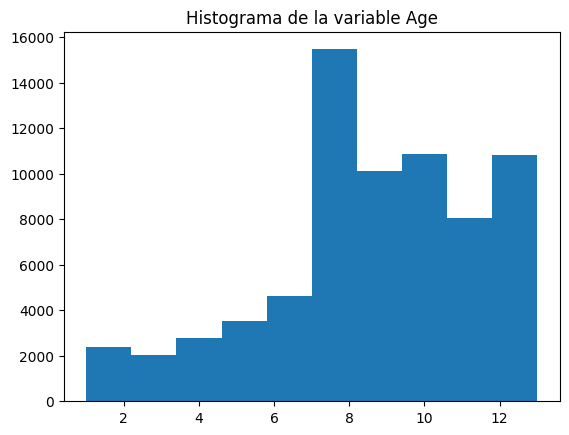

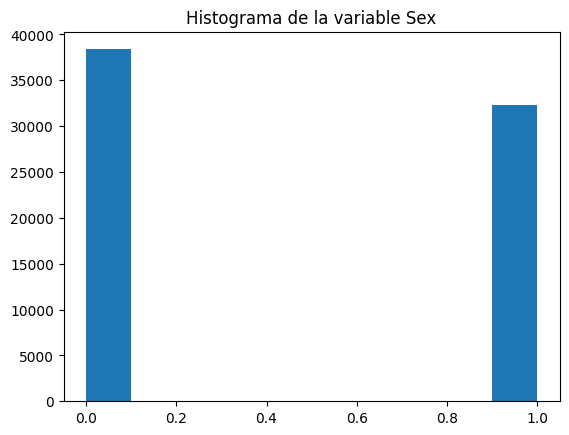

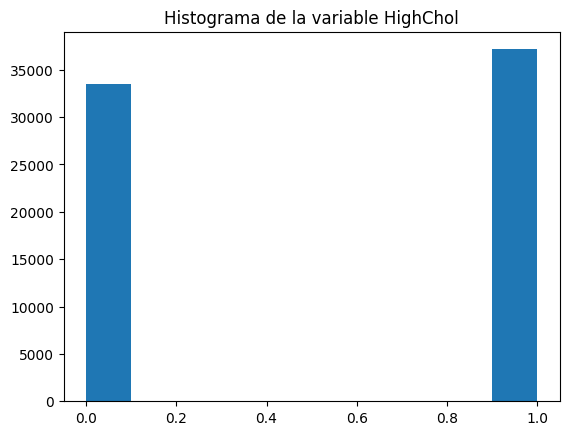

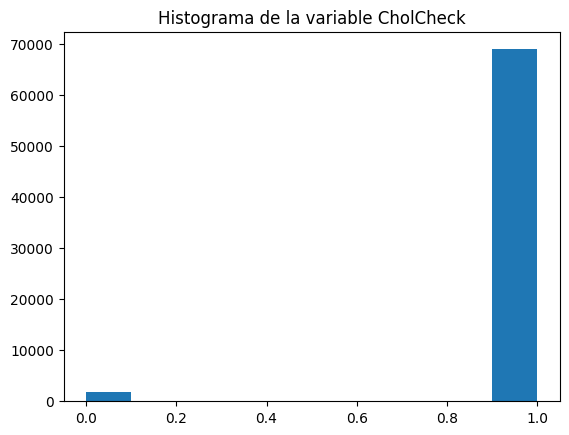

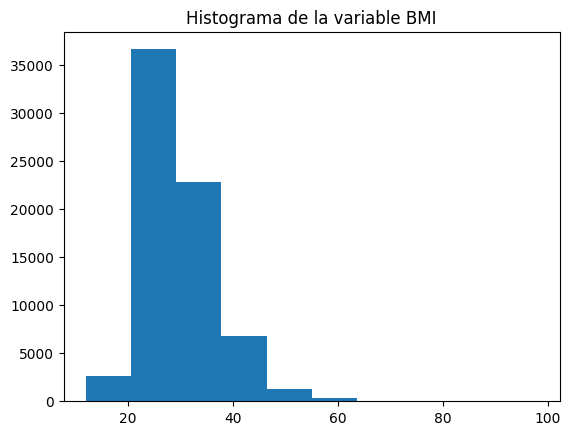

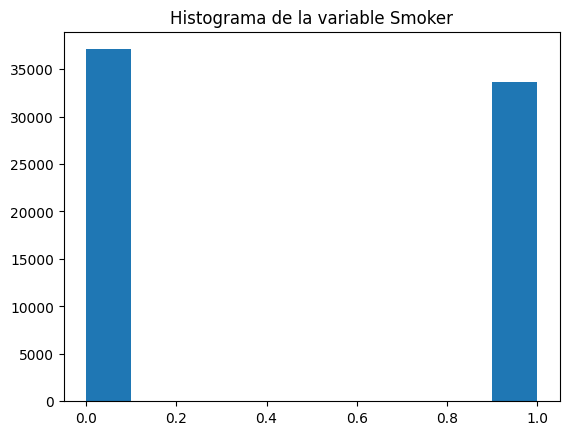

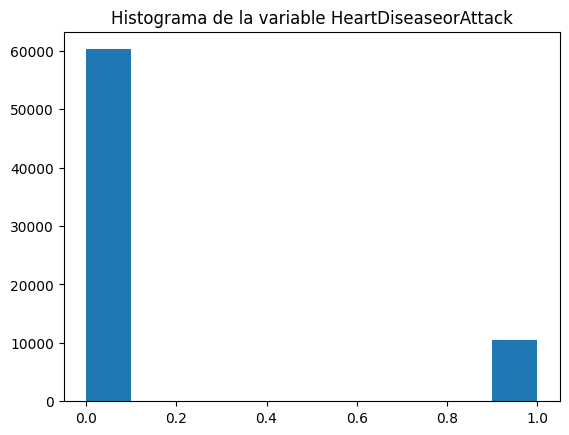

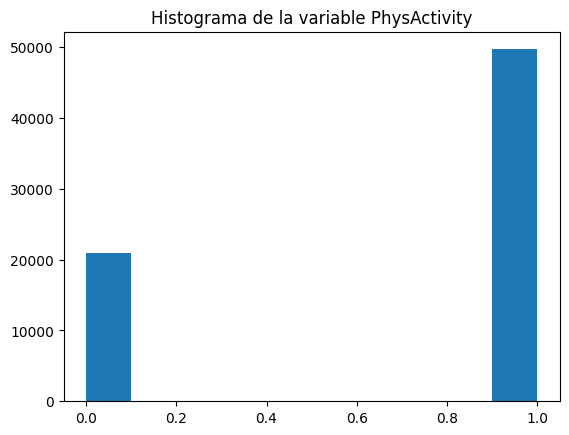

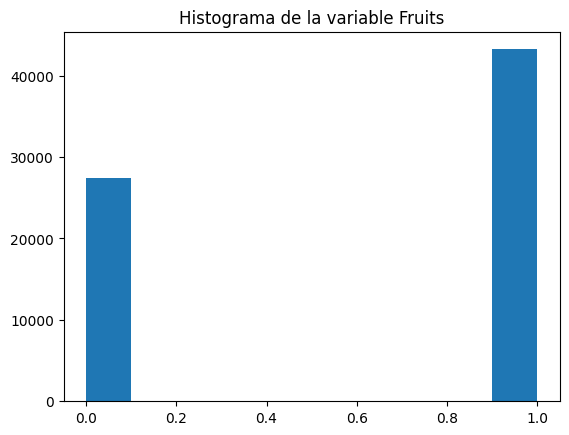

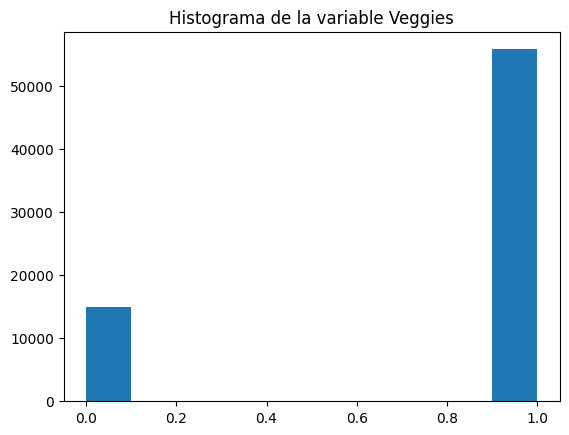

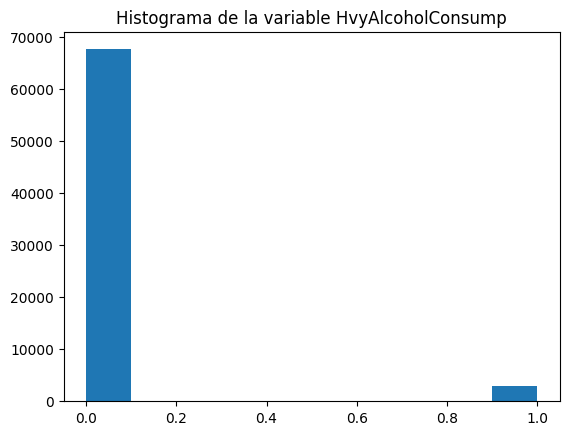

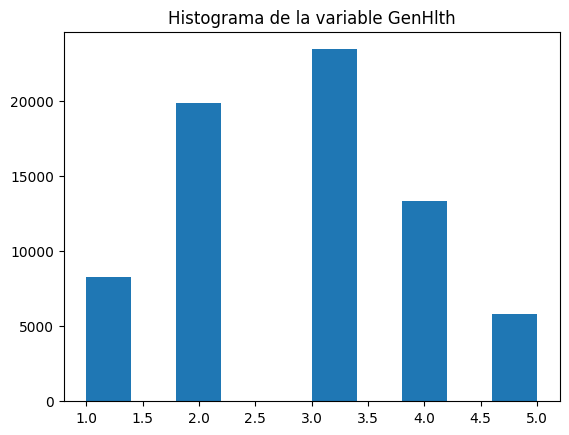

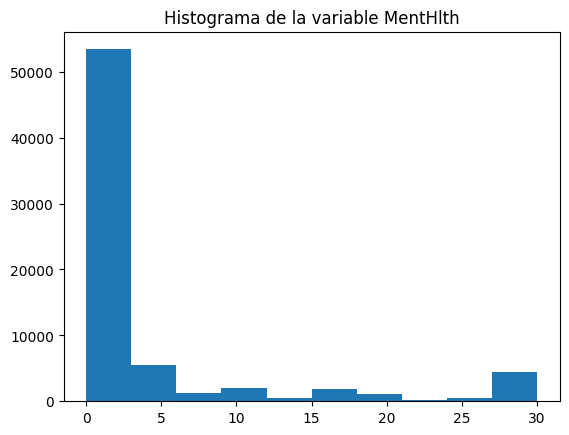

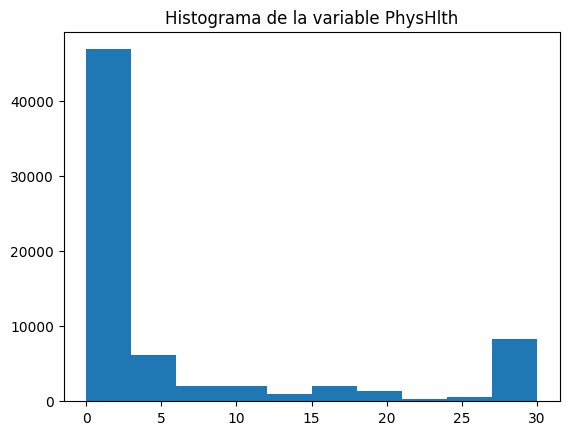

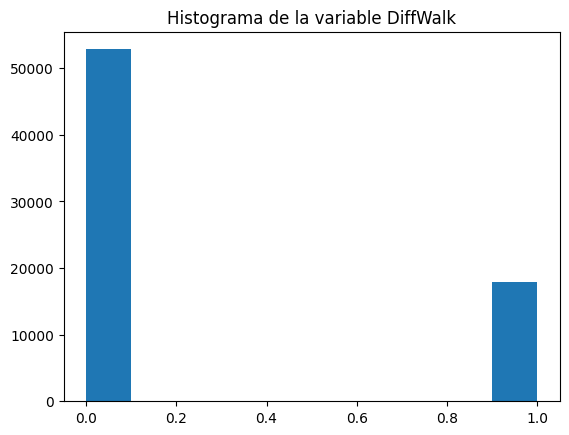

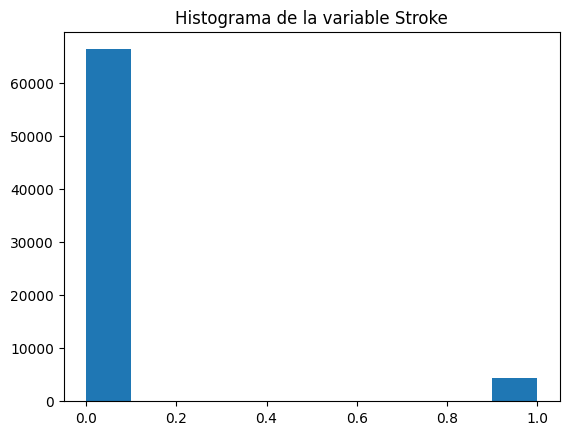

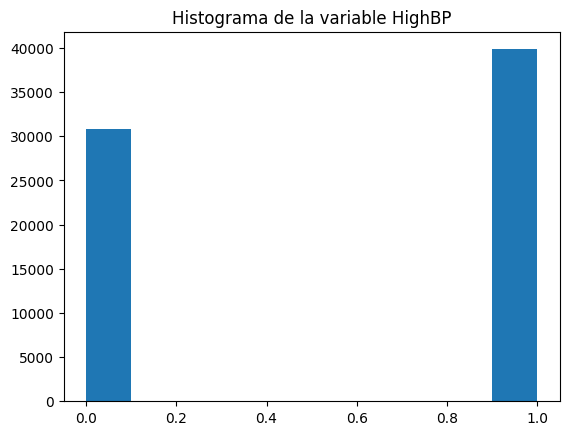

In [ ]:
#Vemos como distribuyen las variables
for var in X.columns:
  plt.hist(X[var])
  plt.title(f'Histograma de la variable {var}')
  plt.show()


In [ ]:
#Separamos las variables que distribuyen normal de las que no lo hacen, hay variables binarias.
normal= ['Age','BMI','GenHlth']
no_normal= ['MentHlth','PhysHlth']

In [ ]:
# Se crea el ColumnTransformer
preprocessor = ColumnTransformer([
        ('normales', StandardScaler(), normal),
        ('no_normales', MinMaxScaler(), no_normal)],
    remainder='passthrough'
    )

#Se crea Pipeline
pipeline = Pipeline(
    steps =[
       ("preprocessor",preprocessor) ,
       ("XGBoost",XGBClassifier())
    ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normales', StandardScaler(),
                                                  ['Age', 'BMI', 'GenHlth']),
                                                 ('no_normales', MinMaxScaler(),
                                                  ['MentHlth', 'PhysHlth'])])),
                ('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               ea...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
#Predicción en el conjunto de validación
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10601
         1.0       0.73      0.79      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



Se observa un buen rendimiento general del modelo, ya que se posee buenos resultados en la precision, recall y f1 para ambas clases.

Estas métricas utilizadas permiten:

*  Precision mide la proporción de instancias correctamente clasificadas dentro de las predicciones positivas.
*  Recall se enfoca en los TP que fueron correctamente identificadas por el modelo.
*  F1-score permite ver una visión general del modelo, ya que corresponde a la media armónica entre precision y recall, combinando ambos modelos anteriores

Las métrica usadas no permiten asegurar que el modelo haga una buena elección de caracteristicas, ya que no es su principal función. Por lo que, se requiere un analisis enfocado en las features para saber si las usadas son las más relevantes o si se podría mejorar el performance seleccionando un conjunto diferente de features.


## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

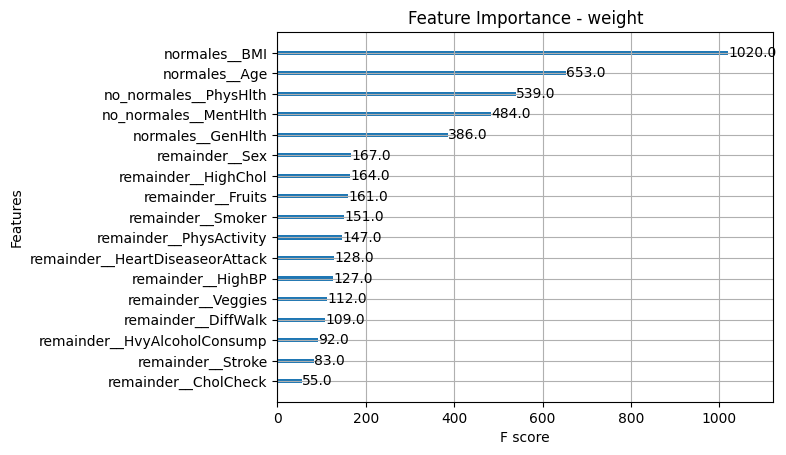

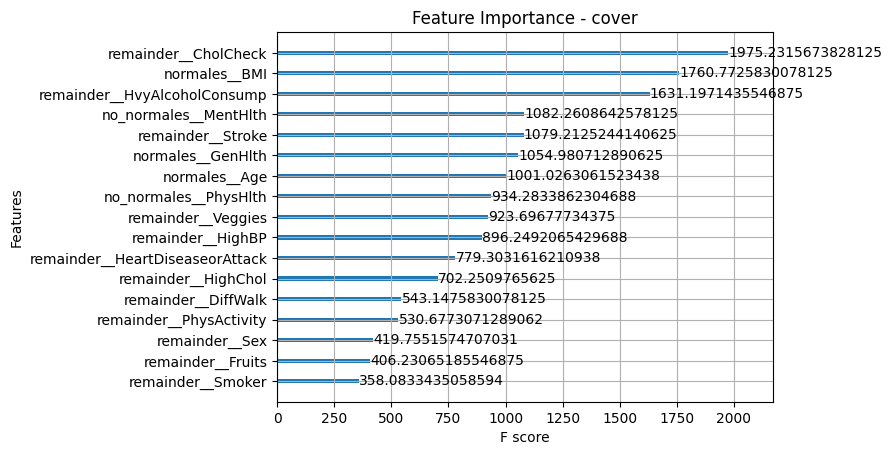

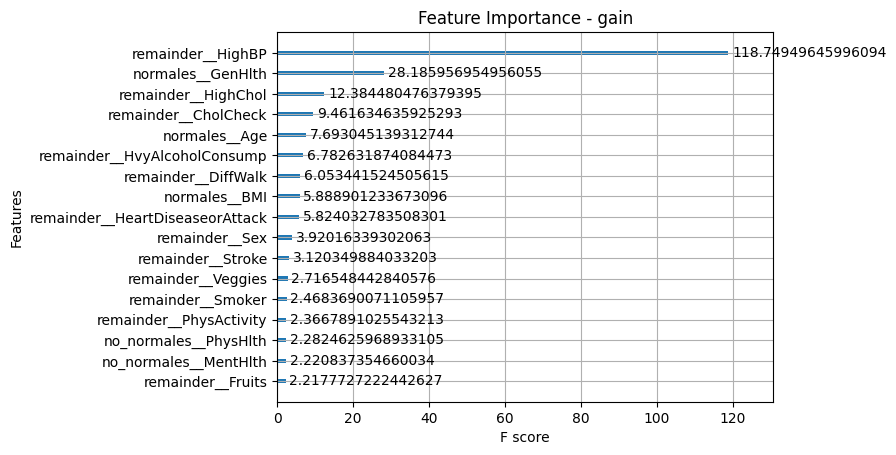

In [ ]:
from xgboost.plotting import plot_importance
from matplotlib import pyplot as plt

#Se accede al modelo desde el pipeline
modelo_xgb = pipeline.named_steps['XGBoost']
modelo_xgb.get_booster().feature_names = list(preprocessor.get_feature_names_out())

# Usar el método plot_importance para cada criterio: weight, cover, gain
metodos=['weight','cover','gain']
for metodo in metodos:
  plot_importance(modelo_xgb, importance_type=metodo)
  plt.title(f'Feature Importance - {metodo}')
  plt.show()

 ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

Los resultados obtenidos con los diferentes métodos no coinciden, debido a que reportan features distintas en los métodos, lo cual se debe a que cada método proporciona una perspectiva diferente sobre la importancia de las caracteristicas; 'weight' considera la frecuencia de uso, 'cover' evalúa el impacto en la cobertura de las muestras, y 'gain' evalúa cómo contribuye cada característica a la mejora del modelo en términos de pérdida.

Las importancias obtenidas no son suficientes para obtener la interpretabilidad del modelo, pero si es un primer acercamiento para comprender que caracteristicas poseen un rol fundamental en las decisiones que tome el modelo.

El método para determinar la importancia de las features posee algunas debilidades, por ejemplo no toma en cuenta las variables altamente correlacionadas, siendo solo una de estas tomadas por el modelo e invisibilizando la importancia de la otra variable u otro ejemplo podría ser la sensibilidad que se tiene a caracteristicas redundantes.


## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

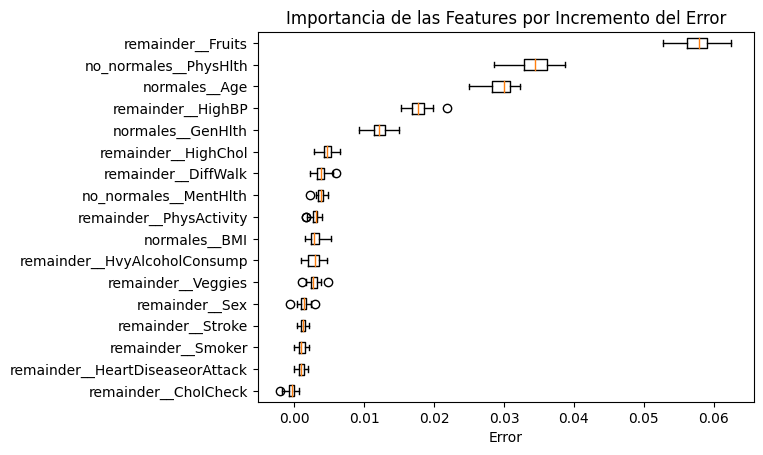

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(list(preprocessor.get_feature_names_out()))[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

In [ ]:
importance_std = np.std(result.importances[perm_sorted_idx], axis=1)

In [ ]:
importance_std

array([0.00063753, 0.0004421 , 0.0005671 , 0.0003948 , 0.00066121,
       0.00076358, 0.00101804, 0.00081201, 0.00060159, 0.00057736,
       0.00082004, 0.00076704, 0.0012821 , 0.00132304, 0.0018843 ,
       0.00237607, 0.00215429])

- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

El método de permutación tiene como objetivo medir el incremento del error (Feature Importance) en la predicción del modelo después de haber permutado valores en las features.

Las características que tienen un mayor impacto en la salida del modelo son:

1. Fruit - El consumo de fruta tiene un impacto en la calidad de la alimentación que posee la persona, por lo que hace sentido que sea una caracteristica importante en el analisis de la diabetes.
2. PhysHlth - La salud física de las personas tiene un impacto directo con la detección de diabetes, debido a que el sobrepeso u obesidad son un indicador de riesgo para la diabetes.
3. Age - Según una búsqueda rápida en google se ve que el promedio de edad de tener diabetes tipo 2 supera los 40 años ([45 es la edad que ya implica un factor de riesgo según este enlace](https://www.medicalnewstoday.com/articles/es/edad-media-de-inicio-para-la-diabetes-tipo-2#:~:text=Share%20on%20Pinterest%20La%20edad,llegan%20a%20los%2045%20a%C3%B1os.)) por lo que si tiene sentido que sea de las caracteristicas más relevantes
4. HighBP - La diabetes es asociada con el incremento del riesgo de desarrollar presión alta, inclusive algunos médicamentos de esta condición afectan los niveles de glucosa en sangre, por lo que si tiene sentido que sea de las features más relevantes.
5. GenHlth - Corresponde a un indicador general de la salud en una escala de 1 a 5, por lo que hace sentido que se encuentre relacionada con la presencia de diabetes.

Las conclusiones interpretables en este momento, difieren considerablemente de las interpretadas anteriormente. Aunque anteriormente si se observan feature en el top que se condicen con las encontradas ahora, el sentido del efecto que tienen sobre la performance del módelo es completamente diferente.

* Ventajas

  1. Fácil interpretación - Este método ofrece resultados sencillos de comprender, ya que evalúa la importancia de las caracteristicas al ver como cambia el rendimiento cuando se permuta una caracteristica.
  2. Comparable con diferentes modelos - Puede aplicarse a una amplia gama de modelos, lo que perimte comparar la importancia relativa de las caracteristicas entre modelos diferentes.
  3. No necesita re-entrenar el modelo - El método permite evaluar la importancia sin reentrenar el modelo, lo que ahorra tiempo y recursos.

* Desventajas

  1. Posibles sesgos por entradas poco realistas si las features estan correlacionadas - Si las características están altamente correlacionadas, permutar una característica puede afectar la interpretación de otra, lo que podría generar resultados sesgados o poco realistas.
  2. Añadir una feature altamente correlacionada con otra que ya está siendo evaluada puede disminuir la importancia de ambas al separar la evaluación.
  3. Enlazado al error del modelo - Está intrínsecamente ligada al rendimiento del modelo, es decir, si este posee un error significativo, la interpretación de la importancia de las features puede ser menos precisa o estar sesgada.


In [ ]:
feature_names = np.array(list(preprocessor.get_feature_names_out()))[perm_sorted_idx]
importance_mean = result.importances_mean[perm_sorted_idx]
importance_std = np.std(result.importances[perm_sorted_idx], axis=1)

data = {
    'Feature': feature_names,
    'Importance Mean': importance_mean,
    'Importance Std': importance_std
}

df_std = pd.DataFrame(data)
df_std

,Feature,Importance Mean,Importance Std
0,remainder__CholCheck,-0.000439,0.000638
1,remainder__HeartDiseaseorAttack,0.000970,0.000442
2,remainder__Smoker,0.001044,0.000567
3,remainder__Stroke,0.001207,0.000395
4,remainder__Sex,0.001309,0.000661
5,remainder__Veggies,0.002809,0.000764
6,remainder__HvyAlcoholConsump,0.002813,0.001018
7,normales__BMI,0.002875,0.000812
8,remainder__PhysActivity,0.002949,0.000602
9,no_normales__MentHlth,0.003775,0.000577


Tanto en el gráfico como en la tabla se puede notar que son en general bastante bajas, siendo la mayor cercana a 0.004. También se observa una relación general (hay excepciones evidentes) de que entre mayor importancia tiene la caracteristica también posee una mayor desviación.


## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
import shap
#Crea un objeto explainer
explainer = shap.TreeExplainer(modelo_xgb)
shap_values = explainer(X)

[05:02:55] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
shap_values

.values =
array([[ 0.08570445,  0.67842495, -0.4307747 , ..., -0.00131571,
        -0.01610174,  0.3679492 ],
       [ 0.36781085,  0.5502204 ,  0.10967587, ..., -0.05198711,
        -0.06441978,  0.337865  ],
       [ 0.19502768,  0.7569983 , -0.3193929 , ..., -0.00649201,
        -0.00491941, -0.43433827],
       ...,
       [ 0.3512192 , -0.13777934,  0.15492395, ...,  0.14722374,
         0.01591664,  0.39632356],
       [-0.07964354, -0.11873614,  0.19561742, ...,  0.15648496,
        -0.03281995,  0.42253864],
       [ 0.02397502, -0.1323708 ,  0.09449251, ..., -0.12630247,
         0.0009979 ,  0.4397947 ]], dtype=float32)

.base_values =
array([-0.00885369, -0.00885369, -0.00885369, ..., -0.00885369,
       -0.00885369, -0.00885369], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?


Los Shap values indican la contribución de cada característica al cambio en la predicción del modelo en comparación con la predicción promedio del modelo en el conjunto de datos de entrenamiento. En resumen, los Shap values ofrecen una forma de interpretar y explicar el comportamiento de un modelo en términos de la contribución de cada característica a las predicciones.

Significado de la positividad/negatividad de los valores:

* Valor positivo: Indica una contribución positiva a la predicción. A medida que el valor de la característica aumenta, la predicción del modelo también tiende a aumentar.

* Valor negativo: Indica una contribución negativa a la predicción. A medida que el valor de la característica aumenta, la predicción del modelo tiende a disminuir.

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

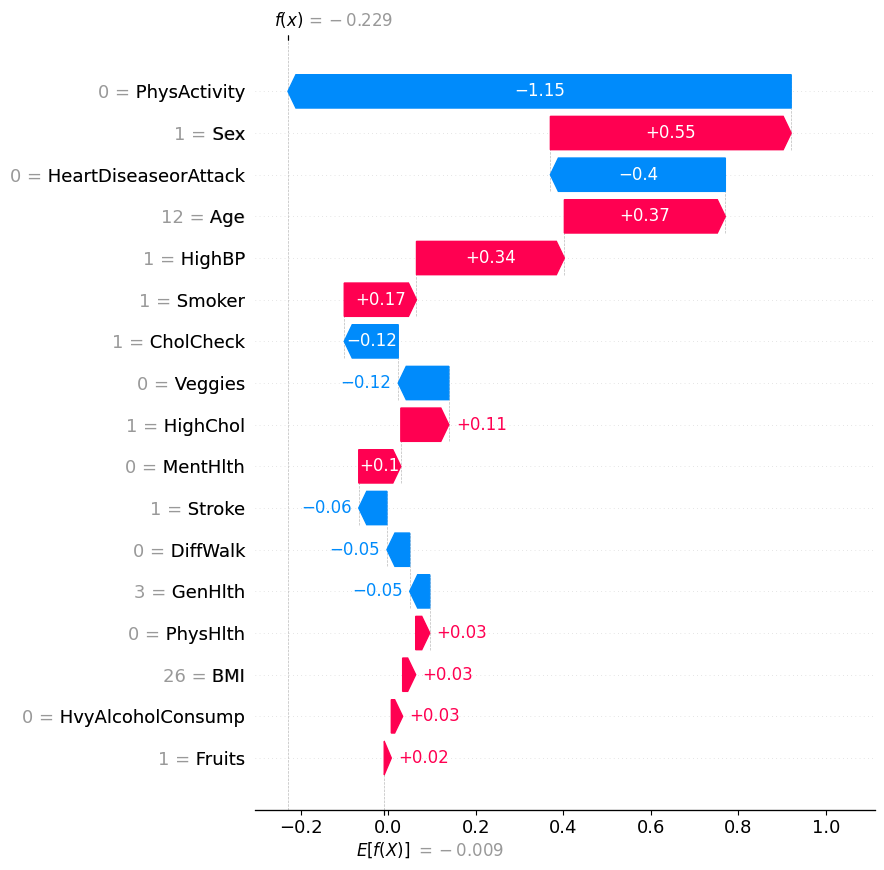

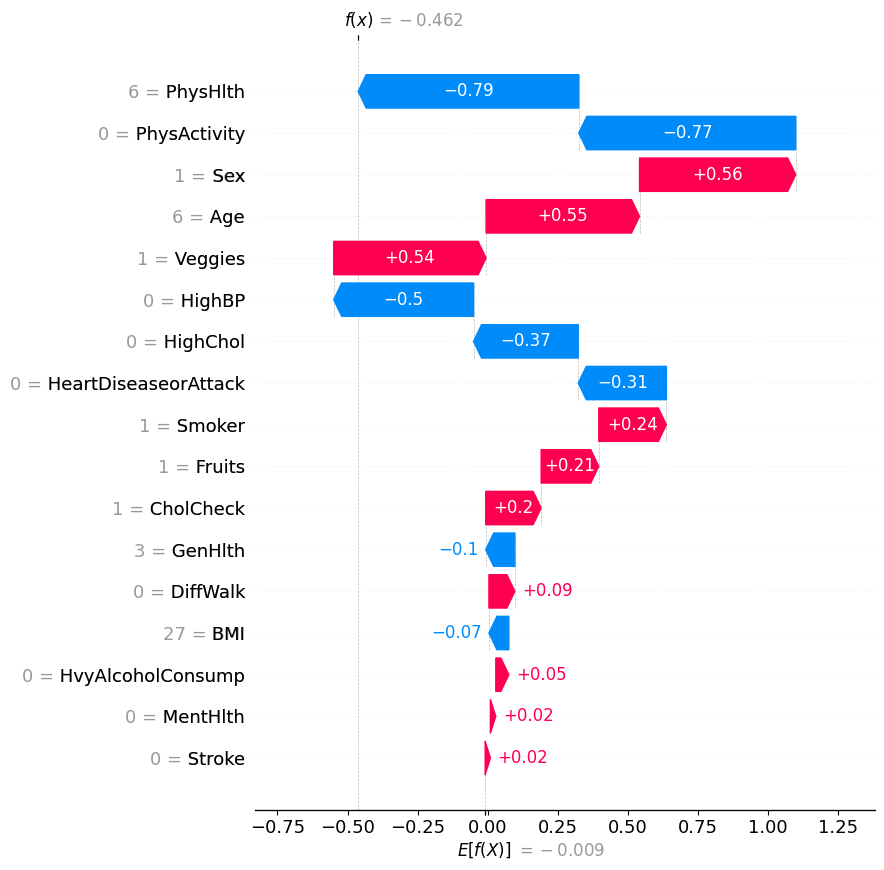

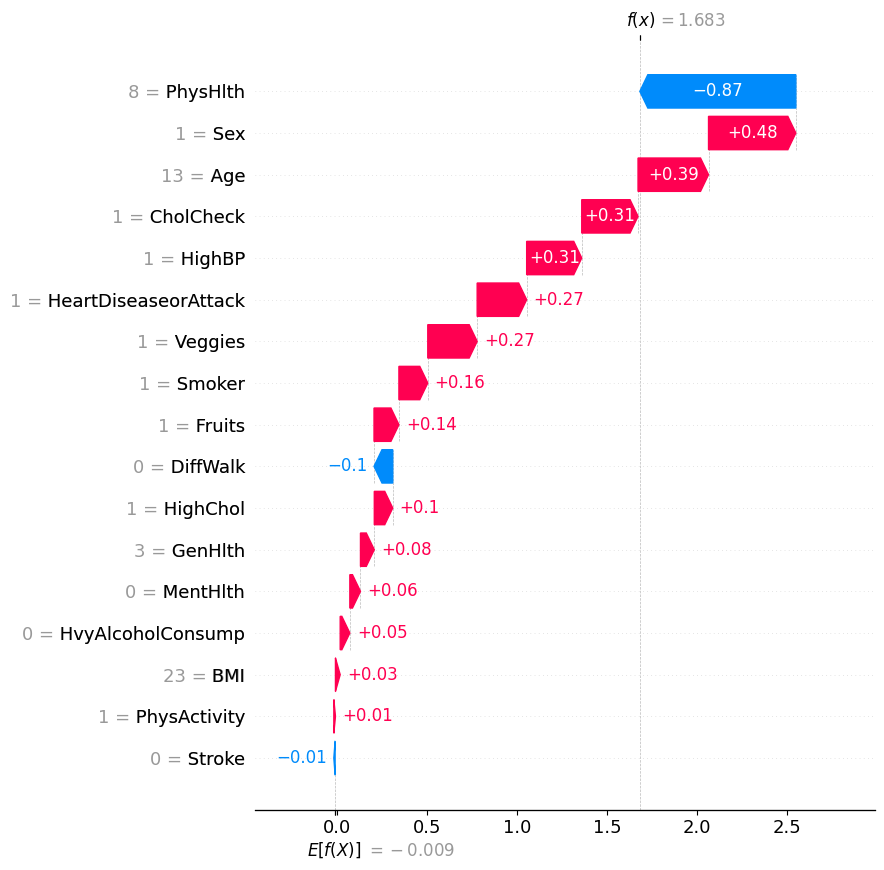

In [ ]:
# Seleccionar las instancias que quieres visualizar (índices 1, 9 y 150)
instancias = [1, 9, 150]

for instancia in instancias:
  #shap.initjs()
  shap.plots.waterfall(shap_values[instancia,:],
                      max_display=18)

1. ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

* Sex: Al analizar los 3 gráficos, se puede observar que para los
3 gráficos se obtiene un valor Sex = 1, y aparece para todos como una de las características principales que afectan positivamente a la probabilidad de tener diabetes.

* Veggies: se puede ver que en esta variable, al tomar un valor igual a 1, impacta positiva y fuertemente la probabilidad de poseer diabetes (particularmente en el segundo resultado), pero el valor 0, si bien afecta negativamente, no tiene gran relevancia, casi neutral en el tercer resultado.

* PhysActivity: cuando toma valor igual a 0, impacta fuertemente de forma negativa a la probabilidad de poseer diabetes en los ejemplos estudiados. Por otro lado el valor igual a 1 afecta positivamente, pero con mucho menor relevancia.

* Age: La edad afecta positivamente a la posibilidad de poseer diabetes en los tres ejemplos.

* HighBP: Se puede observar en los ejemplos, que un valor igual a 0 en HighBP afecta negativa y fuertemente a la posibilidad de poseer diabetes. Por otro lado, el valor igual a 1 afecta fuerte y positivamente la posibilidad de diabetes. Este item hace referencia a la hipertensión, por lo que se podría catalogar a esta condición como un factor de riesgo para diabetes.

* HighChol: Al igual que la característica anterior, se tiene que un valor 0 afecta negativa y fuertemente la posibilidad de poseer diabetes. Por otro lado, se observa que un valor igual a 1 afecta postivamente, pero no de manera tán relevante como las otras características mencionadas.

* PhysHealth: Por último, se observa que un valor más alto en esta característica indica una menos probabilidad de poseer diabetes. El valor menor (0) indica que afecta postiviamente a le probabilidad, pero no de manera tan relevante.

2. ¿Existe algún patrón común entre las instancias analizadas?

En la sección anterior se encontraron patrones en común para las características PhysActivity, HighBP y HighChol. Es destacable que todas son variables binarias.

3. ¿Es posible generalizar estas conclusiones a todo el dataset?

Considerando el significado de cada variable, creemos que es posible generalizar varios de los patrones, como por ejemplo PhysHealth, Veggies, PhysActivity, HighBP y HighChol. Por otro lado, hay carcaterísticas que apriori, con la exploraicón de estos 3 ejemplo, no podríamos generalizar, como lo son Age y Sex.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

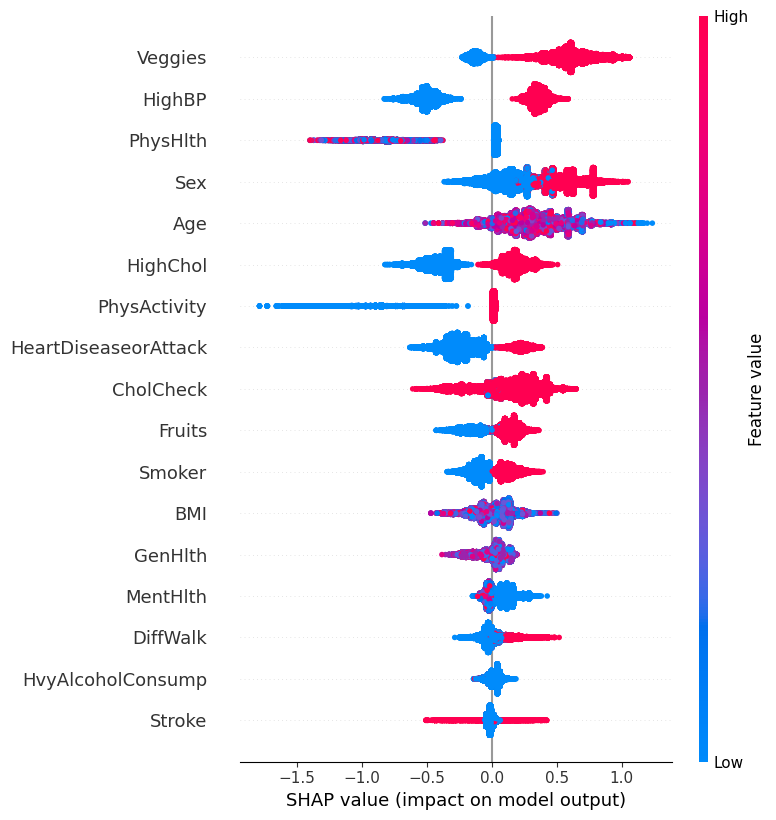

In [ ]:
shap.summary_plot(shap_values, X)

¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

En general las variables descritas no tienen gran diferencia con lo identificado a partir de los ejemplos de las tres instancias. En los que se identificaron tendencias (Physhealth, Veggies, PhysActivity, HighBP y HighChol) el modelo mustra exactamente lo descrito en el análisis anterior.

La principal diferencia respecto a las conclusiones se encuentra en las variables Age y Sex.

En Sex se puede notar tendencia a que el valor 1 posee más probabilidad de poseer diabetes que el valor. No hay tendenca directa en que valor 0 afecta negativamente y 1 positivamente, pero sí el valor 1 afecta con más fuerza postiviamnte a la probabilidad de poseer diabetes.

En cuanto a Age, no se puede identificar una tendencia clara.

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

Veggies


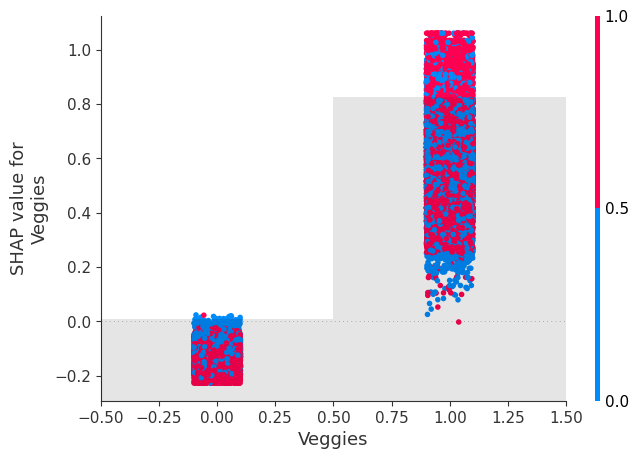

HighBP


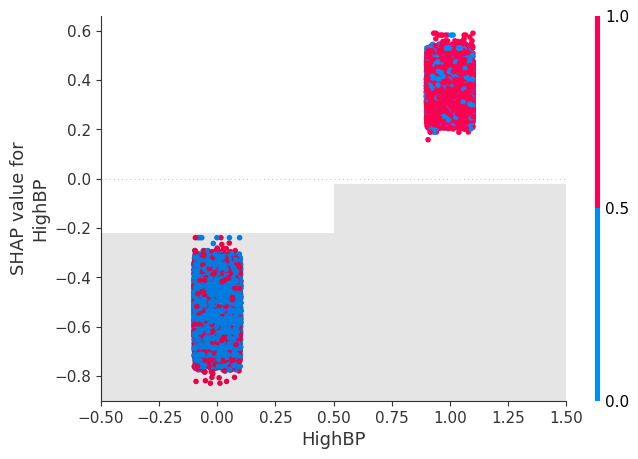

PhysHlth


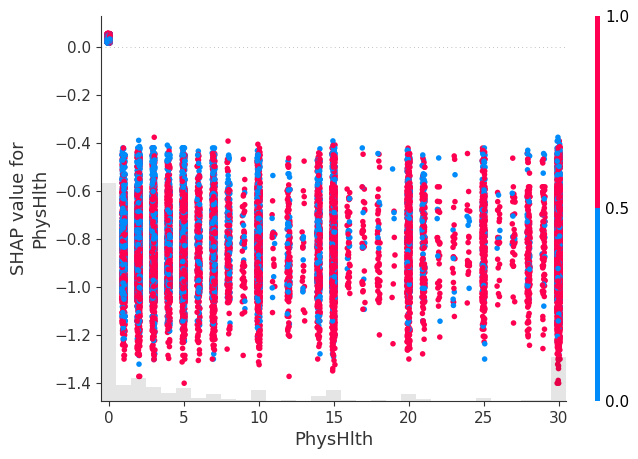

Sex


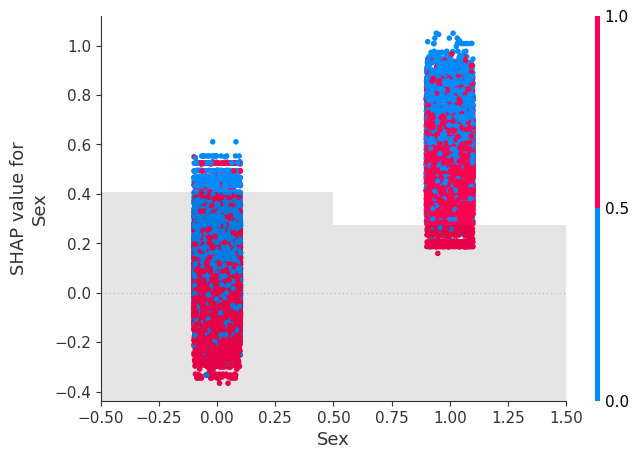

Age


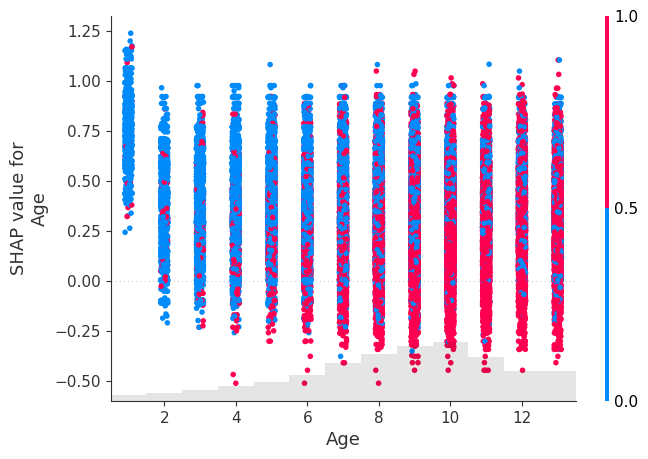

In [ ]:
# obtenemos los shap values
shap_values1 = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
features = X.columns[shap_values1.argsort()[::-1]]

y_pred_X = pipeline.predict(X)

for feature in features[:5]:
    print(feature)
    shap.plots.scatter(shap_values[:,feature],
                   color=y_pred_X)

De los resultados mostrados en los gráficos:

* Veggie: No se puede observar relación clara, puesto que en ambas clasificaciones (0 o 1) se observa una razón similar entre personas con diabetesy sano.

* HighBP: Acá sí se observa relación, que coincide con lo identificado anteriormente. Se puede ver que las personas identificadas con valor 0 en esta variable tienen mucha menor probabilidad de poseer diabetes que las identificadas con 1. Esto tiene sentido considerando que HighBP indica hipertensión.

* PhysHealth: No es posible identificar una tendencia marcada. Parece ser que los valores más bajos de esta varible concentran la mayor cantidad de puntos celestes, es decir, a menor valor de esta varible hay menor probabilidad de poseer diabetes. De cualquier forma, esta tendencia no es clara.

* Sex: No hay tendencia clara. Se observa una distribución similar para ambas clasificaciones.

* Age: Es posible identificar que a menor valor de la variable edad, la probabilidad de poseer diabetes disminuye, y viceversa.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

Veggies


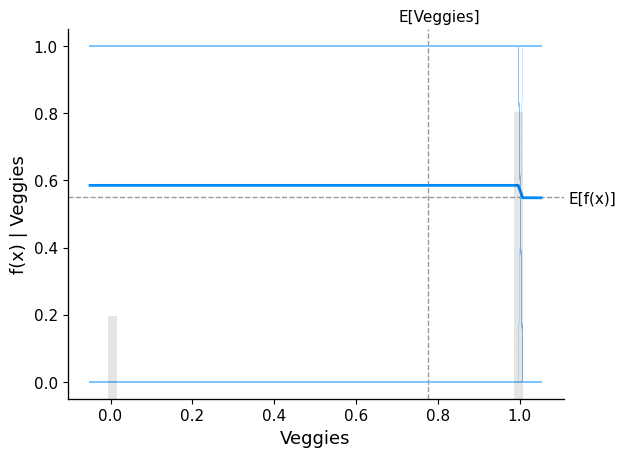

HighBP


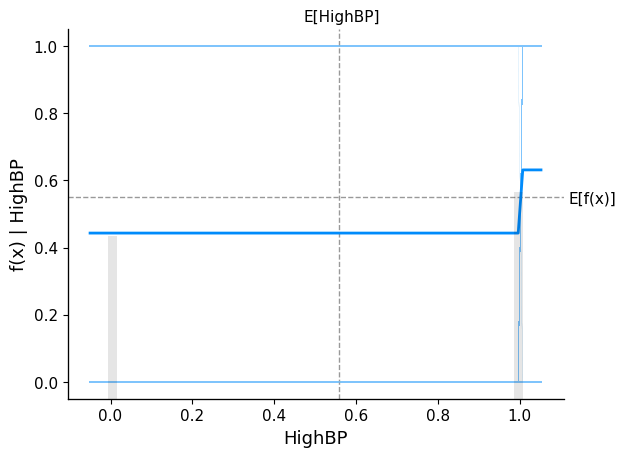

PhysHlth


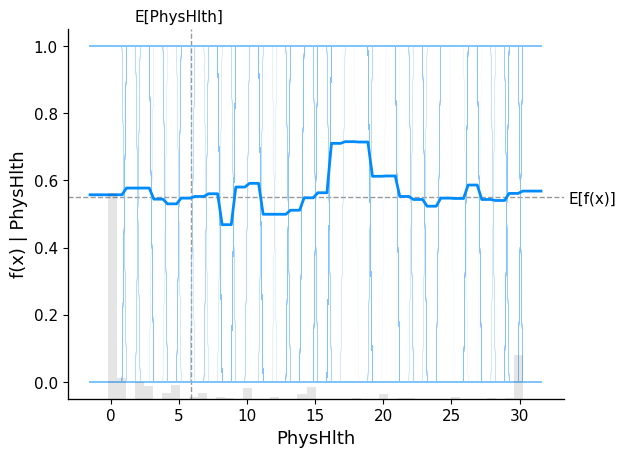

Sex


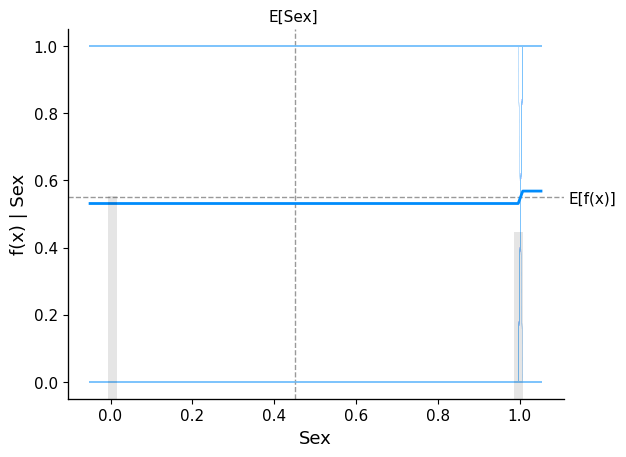

Age


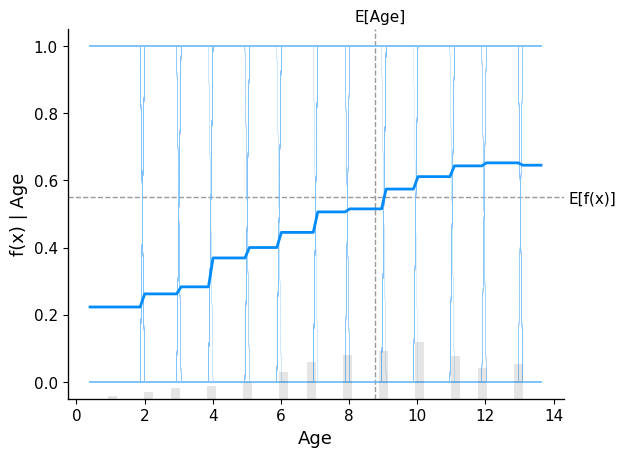

In [ ]:
for feature in features[:5]:
    print(feature)
    shap.partial_dependence_plot(feature, pipeline.predict, shap.utils.sample(X, 1000), model_expected_value=True,
                                 feature_expected_value=True, ice=True)


¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?
* Veggies - Como es una variable binaria el resultado parece ser confuso, pero se puede observar que la probabilidad de tener diabetes asociada al valor 0 es más alta que la asociada al valor 1. Aunque la diferencia observada no es significativa, sí se puede apreciar.
* HighBP - Para esta característica (binaria) la diferencia es entre el valor 0 y 1 es más notoria. Se observa claramente una probabilidad más alta asociada al valor 1.
* PhysHlth - Para esta caracterísitica no se puede observar una relación clara. Se ve un aumento de probabilidad en la mitad del espectro, pero se observa también que la cantidad de datos en este segmento es menor, por lo que podrían estar desequilibrados en la muestra tomada.
* Sex - En esta variable, al igual que en Veggies, no se observa una diferencia clara. Hay un aumento de probabilidad asociado al valor 1, pero no es significativa como para establecer una relación.
* Age - Esta es la variable que tiene una relación más clara, a mayor edad, mayor probabilidad de tener diabetes.

Las conclusiones obtenidas en algunos casos son coincidentes con el análisi hecho anteriormente. En particular, la conclusión para HighBP y Age pueden ser generalizables para el conjunto de datos. El resto de características no demuestra una relación clara y generalizable.

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.3 MB/s eta 0:00:00


In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
predict_fn = lambda x: modelo_xgb.predict(x)
explainer = AnchorTabular(predict_fn, modelo_xgb.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())
class_names = ["no tiene diabetes", "tiene diabetes"]

In [ ]:
def explicacion(idx):
  explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
  print(f'-------Explicación id: {idx}--------')
  print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
  print('Anchor: %s' % (' AND '.join(explanation.anchor)))
  print('Precision: %.2f' % explanation.precision)
  print('Coverage: %.2f' % explanation.coverage)

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000
explicacion(idx)

idx = 3001
# explicar predicción idx 3001
explicacion(idx)

idx = 5751
# explicar predicción idx 5751
explicacion(idx)

-------Explicación id: 1000--------
Prediction:  tiene diabetes
Anchor: remainder__HvyAlcoholConsump <= 0.00 AND remainder__Smoker > 0.00 AND remainder__CholCheck > 0.00
Precision: 0.98
Coverage: 0.28
-------Explicación id: 3001--------
Prediction:  tiene diabetes
Anchor: remainder__HvyAlcoholConsump <= 0.00 AND remainder__CholCheck > 0.00 AND remainder__HighBP > 0.00
Precision: 0.95
Coverage: 0.20
-------Explicación id: 5751--------
Prediction:  tiene diabetes
Anchor: remainder__HvyAlcoholConsump <= 0.00 AND remainder__CholCheck > 0.00 AND normales__BMI > 0.00 AND normales__Age > 7.00
Precision: 0.95
Coverage: 0.14


Las reglas propuestas hacen sentido para las observadios, debido a que se posee una alta precisión para las predicciones realizadas, y estas cubren a un amplio espectro de la población (coverage de 0.28, 0.20 y 0.14).


# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Al implemetar los métodos para analizar la importancia de las features no se obtienen tan buenos resultados en relación al los métodos agnósticos globales y locales, puesto que esto últimos no dependen de criterios ni valores posibles. Son más generales.

A partir de los métodos agnósticos, ya sean locales o globales, es posible obtener mejor contexto del problema analizado, que es exactamente a lo apuntaba el desarrollo de este laboratorio, mejorar la interpretabilidad de los datos.

Para el problema que propone el Dr. Simi, y su interés en la interpretabilidad, el mejor método es basado en los Shap values, puesto que intrega información de la importancia que tiene la variable en específico respecto a la decisión que ha tomado el modelo. Mediante este método se pueden priorizar características de acuerdo a su valor.

Al analizarlo desde el punto de vista global o local, la respuesta varía según el objetivo del Dr. Simi, puesto que si desea una interpretabilidad general sería mejor utilizar el método global a partir de Shap values, ya que permite ver de forma general el impacto que tiene la variable sobre el dataset.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>